In [1]:
import numpy as np
import sys
np.set_printoptions(threshold=sys.maxsize)
import matplotlib.pyplot as plt
sys.path.insert(0, '/home/sudat/athena/vis/python')
import athena_read

In [2]:
datap1 = np.genfromtxt('/home/sudat/one_planet_simulations/disk.hst')
data2p1 = athena_read.athdf('/home/sudat/one_planet_simulations/disk.out1.04000.athdf')
timep1 = datap1[:,0] / (2*np.pi)
sum_torquep1 = datap1[:,10]

densp1 = data2p1.get('dens')[0]
rp1 = data2p1.get('x1v')
phip1 = data2p1.get('x2v')
time2p1 = data2p1.get('Time')
phip1_c = data2p1.get('x2f')
rp1_c = data2p1.get('x1f')

phip1 = phip1[:,None]
d_phip1 = phip1_c[:, None]
d_phip1 = d_phip1[1:] - d_phip1[:-1]
d_rp1 = rp1_c[1:] - rp1_c[:-1]

In [3]:
data = np.genfromtxt('disk.hst')
data2 = athena_read.athdf('disk.out1.04000.athdf')
time = data[:,0] / (2*np.pi)
sum_torque = data[:,10]
sum_torque2 = data[:,11]

dens = data2.get('dens')[0]
r = data2.get('x1v')
phi = data2.get('x2v')
time2 = data2.get('Time')
phi_c= data2.get('x2f')
r_c = data2.get('x1f')

phi = phi[:,None]
d_phi = phi_c[:, None]
d_phi = d_phi[1:] - d_phi[:-1]
d_r = r_c[1:] - r_c[:-1]

In [4]:
'''Conversion from Polar -> Cartesian'''
xp1 = rp1_c[None,:] * np.cos(phip1_c[:,None])
yp1 = rp1_c[None,:] * np.sin(phip1_c[:, None])

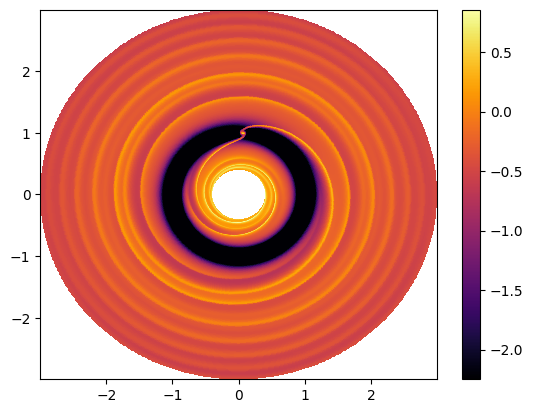

In [5]:
plt.pcolormesh(xp1, yp1, np.log(densp1), cmap='inferno', vmin= -2.25)
plt.colorbar()

In [6]:
'''Conversion from Polar -> Cartesian'''
x = r_c[None,:] * np.cos(phi_c[:,None])
y = r_c[None,:] * np.sin(phi_c[:, None])

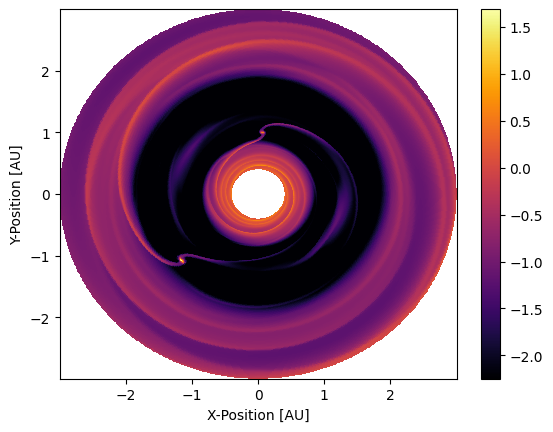

In [7]:
plt.pcolormesh(x, y, np.log(dens), cmap='inferno', vmin = -2.25)
plt.xlabel('X-Position [AU]')
plt.ylabel('Y-Position [AU]')
plt.colorbar()

Text(0.5, 1.0, 'Planet 1 [One Planet Simulation]')

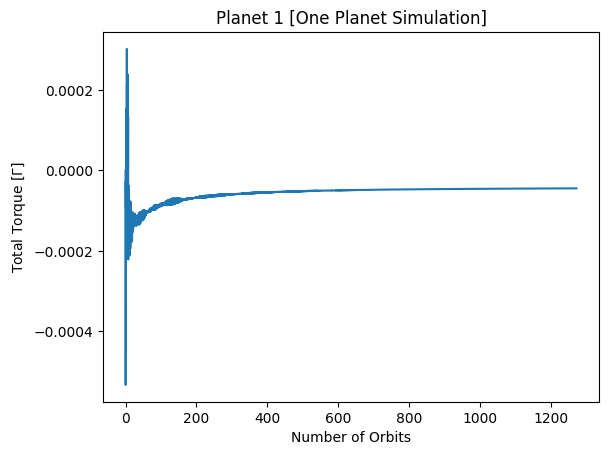

In [8]:
plt.plot(timep1, sum_torquep1)
plt.xlabel('Number of Orbits')
plt.ylabel(r'Total Torque [$\Gamma$]')
plt.title('Planet 1 [One Planet Simulation]')

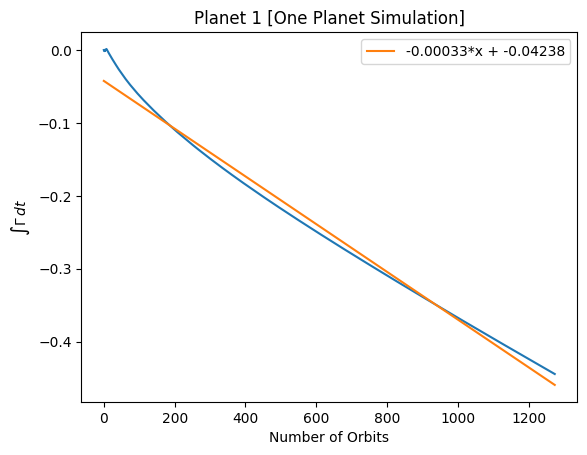

In [9]:
torque_integralp1 = np.cumsum(sum_torquep1 * 0.5)
plt.plot(timep1, torque_integralp1)
plt.ylabel(r'$\int \Gamma \, dt$')
plt.xlabel('Number of Orbits')
plt.title('Planet 1 [One Planet Simulation]')
m,b = np.polyfit(timep1, torque_integralp1, deg=1)
plt.plot(timep1, m*(timep1)+b, label=f'{np.round(m,5)}*x + {np.round(b,5)}')
plt.legend()

Text(0.5, 1.0, 'Planet 1')

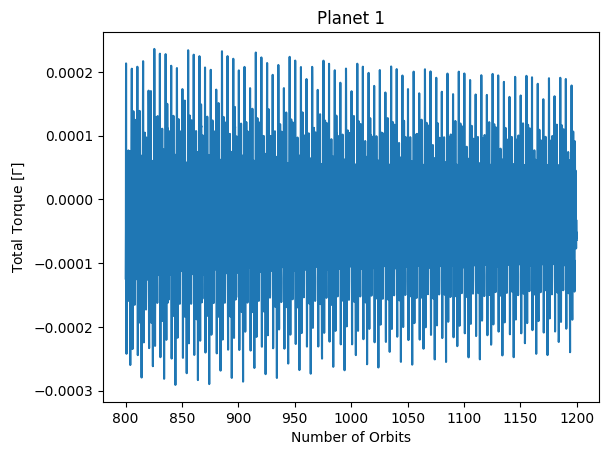

In [10]:
plt.plot(time[10054:15080], sum_torque[10054:15080])
plt.xlabel('Number of Orbits')
plt.ylabel(r'Total Torque [$\Gamma$]')
plt.title('Planet 1')

Text(0.5, 1.0, 'Planet 2')

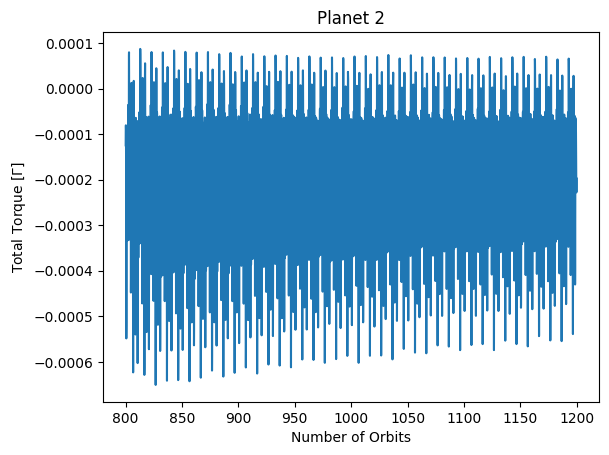

In [11]:
plt.plot(time[10054:15080], sum_torque2[10054:15080])
plt.xlabel('Number of Orbits')
plt.ylabel(r'Total Torque [$\Gamma$]')
plt.title('Planet 2')

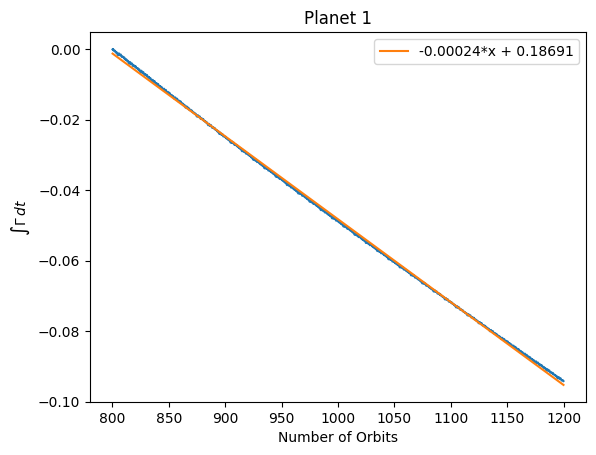

In [12]:
torque_integral = np.cumsum(sum_torque[10054:15080] * 0.5)
plt.plot(time[10054:15080], torque_integral)
plt.ylabel(r'$\int \Gamma \, dt$')
plt.xlabel('Number of Orbits')
plt.title('Planet 1')
m,b = np.polyfit(time[10054:15080], torque_integral, deg=1)
plt.plot(time[10054:15080], m*(time[10054:15080])+b, label=f'{np.round(m,5)}*x + {np.round(b,5)}')
plt.legend()

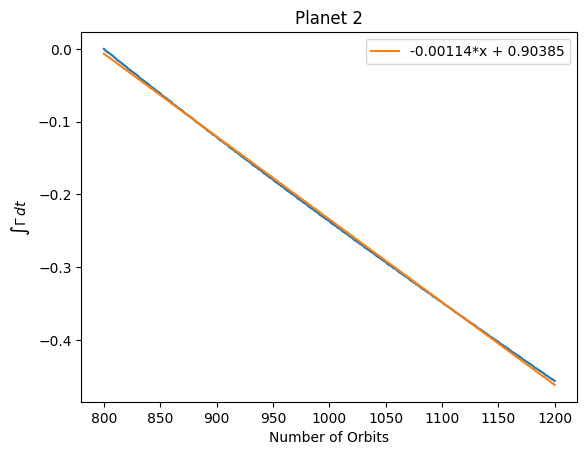

In [13]:
torque_integral2 = np.cumsum(sum_torque2[10054:15080] * 0.5)
plt.plot(time[10054:15080], torque_integral2)
plt.ylabel(r'$\int \Gamma \, dt$')
plt.xlabel('Number of Orbits')
plt.title('Planet 2')
m2,b2 = np.polyfit(time[10054:15080], torque_integral2, deg=1)
plt.plot(time[10054:15080], m2*(time[10054:15080])+b2, label=f'{np.round(m2,5)}*x + {np.round(b2,5)}')
plt.legend()

Total Torque:
$$\Gamma = \iint_{S} \vec{r} \times \vec{g} \, dm \Rightarrow \iint_{S} \Sigma (r, \phi) |\vec{r}| |\vec{g}| \sin\theta \, dA \Rightarrow \iint_{S} \Sigma (r, \phi) r^2 |\vec{g}| \sin\theta \, dr d\phi$$
$$\Gamma_{\Sigma} = \Sigma (r, \phi) |\vec{g}| \sin\theta$$

Total Torque per unit radius:
$$\frac{\partial \Gamma}{\partial r} = r^2 \int \Sigma (r, \phi) |\vec{g}| \sin\theta \, d\phi \Rightarrow r^2 \int \Gamma_{\Sigma} \, d\phi$$

$$\Gamma = \int \frac{\partial \Gamma}{\partial r} \, dr$$

In [14]:
def initial(r, phi, time2, rp, gm_planet):
    epsilon = 0.3
    gm0 = 1.0
    R_H = rp*np.cbrt(gm_planet/(3*gm0))
    period = 2*np.pi* np.sqrt(rp**3 / gm0)
    phip = 2 * (np.pi / period) * time2
    d = np.sqrt(pow(rp,2) + pow(r,2) - 2*rp*r*np.cos(phi - phip))
    g_mag = -1*((gm_planet*d) / (np.sqrt(pow(pow(d,2) + pow(epsilon,2)*pow(R_H,2), 3))))
    sine_term = (r*rp*np.cos(phi)*np.sin(phip) - r*rp*np.sin(phi)*np.cos(phip)) / (r*d)
    return g_mag, sine_term

In [15]:
r_torquep1 = 0
g_mag = initial(rp1, phip1, time2p1, 1, 0.000954588)[0]
sine_term = initial(rp1, phip1, time2p1, 1, 0.000954588)[1]

r_torquep1 = rp1**2*np.sum(densp1 * g_mag * sine_term * d_phip1, axis=0)

In [16]:
r_torque1 = 0 
g_mag = initial(r, phi, time2, 1, 0.000954588)[0]
sine_term = initial(r, phi, time2, 1, 0.000954588)[1]
 
r_torque1 = r**2*np.sum(dens * g_mag * sine_term * d_phi, axis=0)

In [17]:
r_torque_p2 = 0
g_mag = initial(r, phi, time2, np.cbrt(4), 0.000954588)[0]
sine_term = initial(r, phi, time2, np.cbrt(4), 0.000954588)[1]

r_torque_p2 = r**2*np.sum(dens * g_mag * sine_term * d_phi, axis = 0)

In [18]:
'''Planet 1 One-Planet Simulation'''
sum_r_torque = 0
for i in range(3500,4000):
    data = athena_read.athdf(f'/home/sudat/one_planet_simulations/disk.out1.0{i}.athdf')
    dens = data.get('dens')[0]
    r = data.get('x1v')
    phi = data.get('x2v')
    time2 = data.get('Time')
    d_phi= data.get('x2f')
    d_r = data.get('x1f')

    phi = phi[:,None]
    d_phi = d_phi[:, None]
    d_phi = d_phi[1:] - d_phi[:-1]
    d_r = d_r[1:] - d_r[:-1]

    g_mag = initial(r, phi, time2, 1, 0.000954588)[0]
    sine_term = initial(r, phi, time2, 1, 0.000954588)[1]
 
    sum_r_torque += r**2*np.sum(dens * g_mag * sine_term * d_phi, axis=0)

r_torque_avgp1 = sum_r_torque/len(range(3500,4000))

In [19]:
'''Planet 1 Two-Planet Simulation'''
sum_r_torque = 0
for i in range(3500,4000):
    data = athena_read.athdf(f'/home/sudat/resonance_two_planet_simulations/disk.out1.0{i}.athdf')
    dens = data.get('dens')[0]
    r = data.get('x1v')
    phi = data.get('x2v')
    time2 = data.get('Time')
    d_phi= data.get('x2f')
    d_r = data.get('x1f')

    phi = phi[:,None]
    d_phi = d_phi[:, None]
    d_phi = d_phi[1:] - d_phi[:-1]
    d_r = d_r[1:] - d_r[:-1]

    g_mag = initial(r, phi, time2, 1, 0.000954588)[0]
    sine_term = initial(r, phi, time2, 1, 0.000954588)[1]
 
    sum_r_torque += r**2*np.sum(dens * g_mag * sine_term * d_phi, axis=0)

r_torque_avg_p1 = sum_r_torque/len(range(3500,4000))

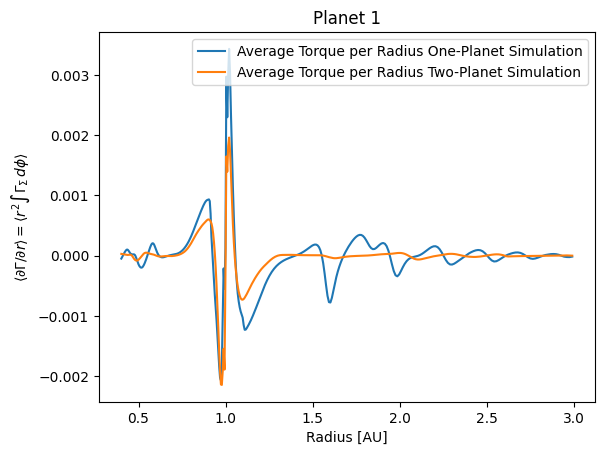

In [20]:
plt.plot(rp1, r_torque_avgp1, label='Average Torque per Radius One-Planet Simulation')
plt.plot(r, r_torque_avg_p1, label='Average Torque per Radius Two-Planet Simulation')
plt.ylabel(r'$\langle {\partial \Gamma} / {\partial r} \rangle = \langle r^2 \int \Gamma_{\Sigma} \, d\phi \rangle$')
plt.xlabel('Radius [AU]')
plt.title('Planet 1')
plt.legend()

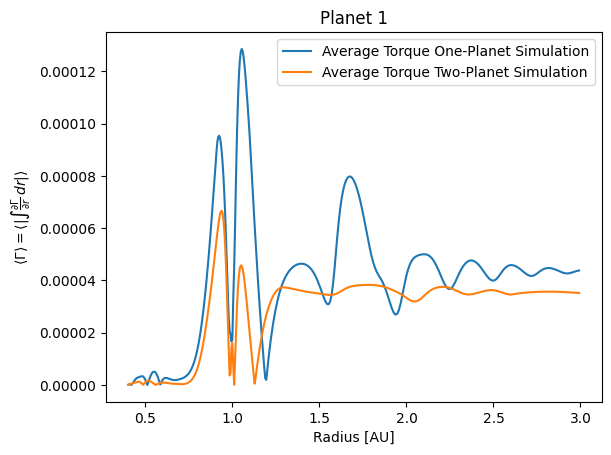

In [21]:
plt.plot(rp1, np.abs(np.cumsum(r_torque_avgp1 * d_rp1)), label='Average Torque One-Planet Simulation')
plt.plot(r, np.abs(np.cumsum(r_torque_avg_p1 * d_r)), label='Average Torque Two-Planet Simulation')
plt.ylabel(r'$\langle \Gamma \rangle = \langle |\int \frac{\partial \Gamma}{\partial r} \, dr| \rangle$')
plt.xlabel('Radius [AU]')
plt.title('Planet 1')
plt.legend()

In [22]:
'''Planet 2'''
sum_r_torque = 0
for i in range(3500,4000):
    data = athena_read.athdf(f'/home/sudat/resonance_two_planet_simulations/disk.out1.0{i}.athdf')
    dens = data.get('dens')[0]
    r = data.get('x1v')
    phi = data.get('x2v')
    time2 = data.get('Time')
    d_phi= data.get('x2f')
    d_r = data.get('x1f')

    phi = phi[:,None]
    d_phi = d_phi[:, None]
    d_phi = d_phi[1:] - d_phi[:-1]
    d_r = d_r[1:] - d_r[:-1]

    g_mag = initial(r, phi, time2, np.cbrt(4), 0.000954588)[0]
    sine_term = initial(r, phi, time2, np.cbrt(4), 0.000954588)[1]
 
    sum_r_torque += r**2*np.sum(dens * g_mag * sine_term * d_phi, axis=0)

r_torque_avg_p2 = sum_r_torque / len(range(3500,4000))

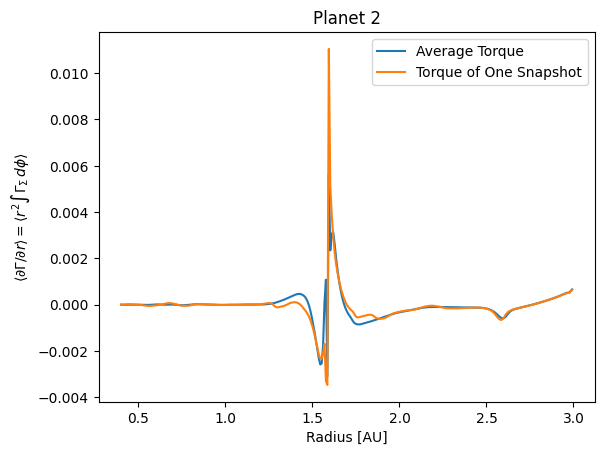

In [23]:
plt.plot(r, r_torque_avg_p2, label='Average Torque')
plt.plot(r, r_torque_p2, label='Torque of One Snapshot')
plt.ylabel(r'$\langle {\partial \Gamma} / {\partial r} \rangle = \langle r^2 \int \Gamma_{\Sigma} \, d\phi \rangle$')
plt.xlabel('Radius [AU]')
plt.title('Planet 2')
plt.legend()

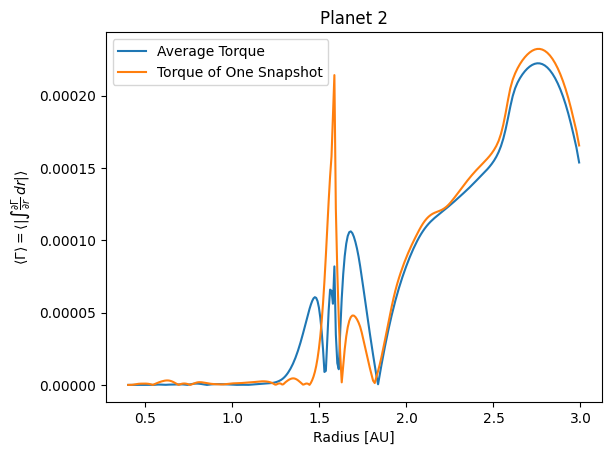

In [24]:
plt.plot(r, np.abs(np.cumsum(r_torque_avg_p2* d_r)), label='Average Torque')
plt.plot(r, np.abs(np.cumsum(r_torque_p2*d_r)), label='Torque of One Snapshot')
plt.ylabel(r'$\langle \Gamma \rangle = \langle |\int \frac{\partial \Gamma}{\partial r} \, dr| \rangle$')
plt.xlabel('Radius [AU]')
plt.title('Planet 2')
plt.legend()

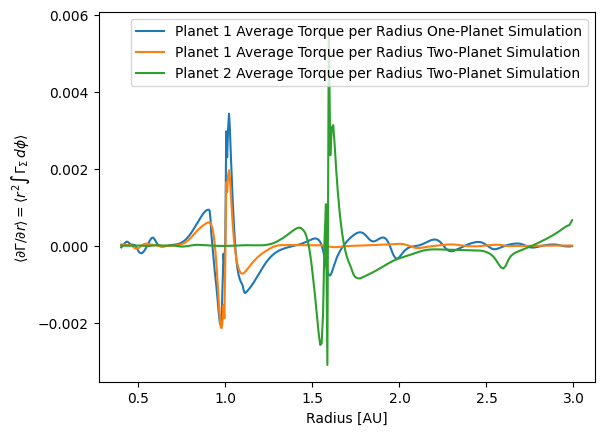

In [25]:
plt.plot(rp1, r_torque_avgp1, label='Planet 1 Average Torque per Radius One-Planet Simulation')
plt.plot(r, r_torque_avg_p1, label='Planet 1 Average Torque per Radius Two-Planet Simulation')
plt.plot(r, r_torque_avg_p2, label='Planet 2 Average Torque per Radius Two-Planet Simulation')
plt.ylabel(r'$\langle {\partial \Gamma} / {\partial r} \rangle = \langle r^2 \int \Gamma_{\Sigma} \, d\phi \rangle$')
plt.xlabel('Radius [AU]')
plt.legend(fontsize=10)

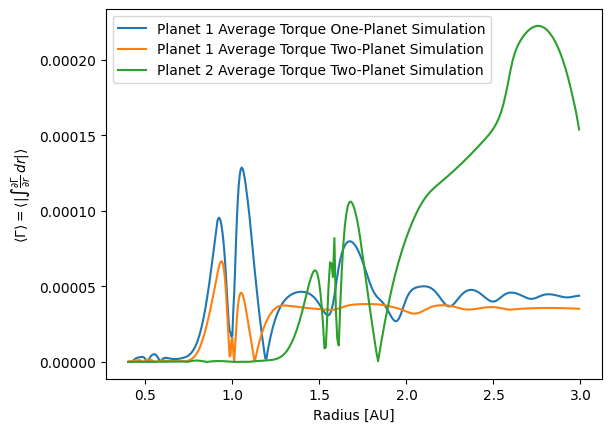

In [26]:
plt.plot(rp1, np.abs(np.cumsum(r_torque_avgp1 * d_rp1)), label='Planet 1 Average Torque One-Planet Simulation')
plt.plot(r, np.abs(np.cumsum(r_torque_avg_p1 * d_r)), label='Planet 1 Average Torque Two-Planet Simulation')
plt.plot(r, np.abs(np.cumsum(r_torque_avg_p2* d_r)), label='Planet 2 Average Torque Two-Planet Simulation')
plt.ylabel(r'$\langle \Gamma \rangle = \langle |\int \frac{\partial \Gamma}{\partial r} \, dr| \rangle$')
plt.xlabel('Radius [AU]')
plt.legend()